In [1]:
# Importing important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Loading the File

In [3]:
df = pd.read_csv("StudentPerformanceFactors.csv")

In [4]:
# To display the first 5 rows of the dataset
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
# To display the last 5 rows of the dataset
df.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


In [6]:
# To display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [7]:
# To show the number of rows and columns in the dataset (no of rows, no of columns)
df.shape

(6607, 20)

In [8]:
# To display the summary statistics of the dataset
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Handling Missing Values

In [10]:
# To check for number of missing values in each column in the dataset
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

#### From our observation, Teacher_Quality, Parental_Education_Level and Distance_from_Home have missing values. These values are little when compared to the number of entries in the dataset, so we drop them.

In [12]:
# Dropping the missing values
df.dropna(subset= ["Teacher_Quality", "Parental_Education_Level", "Distance_from_Home"], inplace = True)

In [13]:
# To check if the missing values have been rectified
df.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_Influence              6378 non-null   object
 1

#### The Outliers has been resolved!!!

# Checking and Handling Outliers

In [17]:
# Checking the Summary statistics of the dataset 
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


<Axes: >

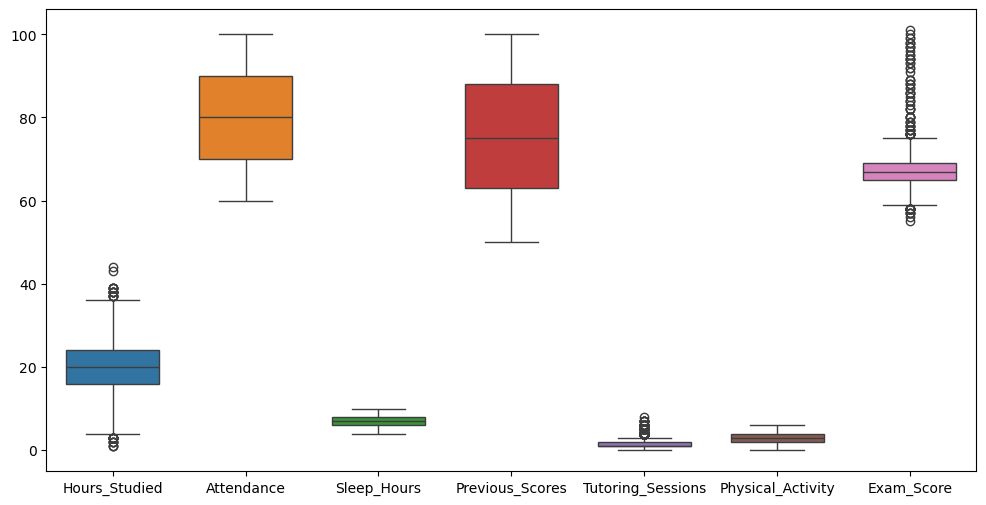

In [18]:
# Using boxplot to check for outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize = (12, 6))
sns.boxplot(data = df[numerical_cols], widths = 0.7)

#### From our observation, Hours_Studied, Tutoring_Sessions and Exam_Score have Outliers. 
#### We will be using the Capping Method, whereby the outliers are capped to the nearest boundary within the Inter-Quartile Range

In [20]:
# Handling Outliers by capping values within the IQR bounds
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))


In [21]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.973346,80.020853,7.034964,75.066165,1.436736,2.972719,67.139542
std,5.947598,11.550723,1.468033,14.400389,1.096792,1.028926,3.381262
min,4.000000,60.000000,4.000000,50.000000,0.000000,0.000000,59.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,36.000000,100.000000,10.000000,100.000000,3.500000,6.000000,75.000000


<Axes: >

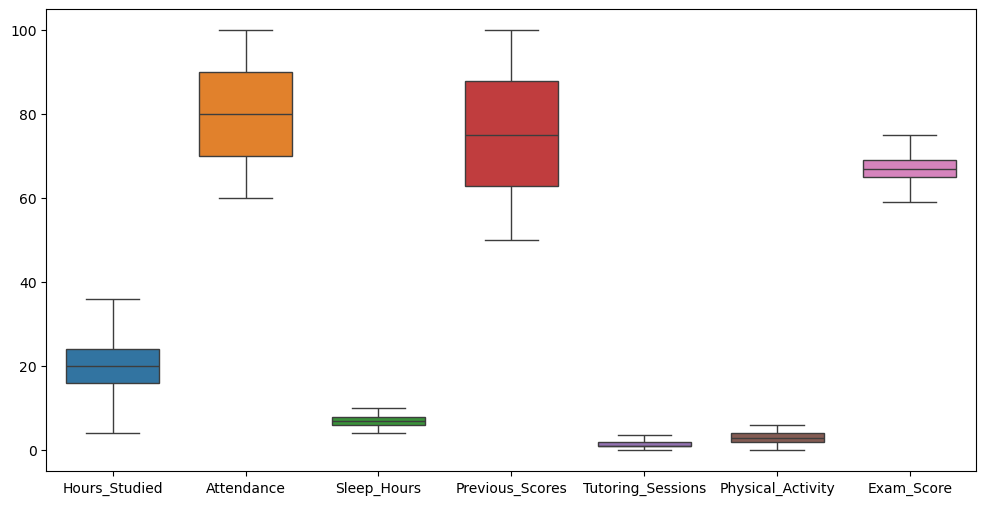

In [22]:
# Using boxplot to check for outliers
plt.figure(figsize = (12, 6))
sns.boxplot(data = df[numerical_cols], widths = 0.7)

### The Outliers have been Handled Sucessfully!!!

# Checking for Skewness

In [25]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.973346,80.020853,7.034964,75.066165,1.436736,2.972719,67.139542
std,5.947598,11.550723,1.468033,14.400389,1.096792,1.028926,3.381262
min,4.000000,60.000000,4.000000,50.000000,0.000000,0.000000,59.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,36.000000,100.000000,10.000000,100.000000,3.500000,6.000000,75.000000


C:\Users\Win 10\AppData\Local\Temp\ipykernel_5824\2169032519.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Hours_Studied,  hist=True, kde=True)


Skewness = -0.0013912624303602668


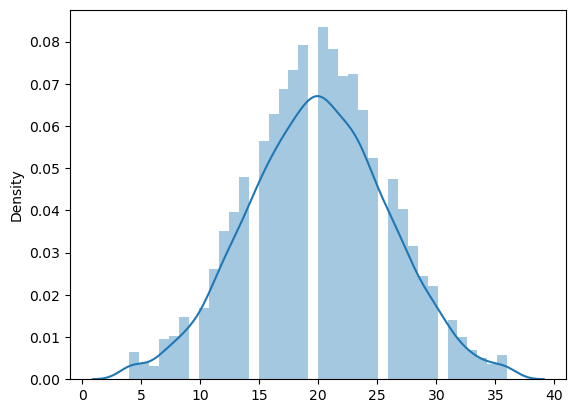

In [26]:
sns.distplot(x =df.Hours_Studied,  hist=True, kde=True)
print(f"Skewness = {df.Hours_Studied.skew()}")

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5824\33438382.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Attendance,  hist=True, kde=True)


Skewness = 0.005662718901984047


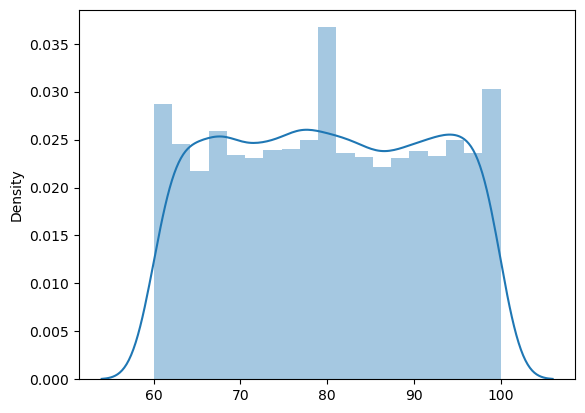

In [27]:
sns.distplot(x =df.Attendance,  hist=True, kde=True)
print(f"Skewness = {df.Attendance.skew()}")

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5824\2209405888.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Sleep_Hours,  hist=True, kde=True)


Skewness = -0.02681432855871459


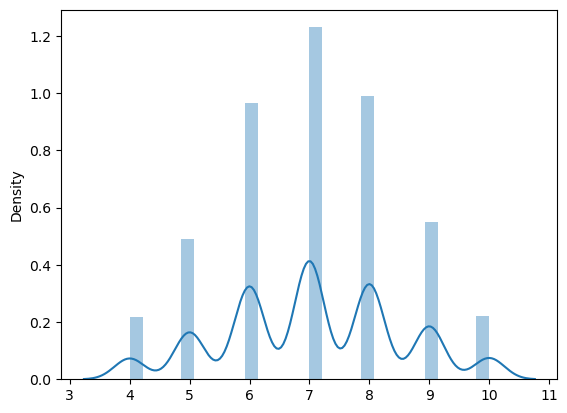

In [28]:
sns.distplot(x =df.Sleep_Hours,  hist=True, kde=True)
print(f"Skewness = {df.Sleep_Hours.skew()}")

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5824\3906933894.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Previous_Scores,  hist=True, kde=True)


Skewness = -0.0013616826888904168


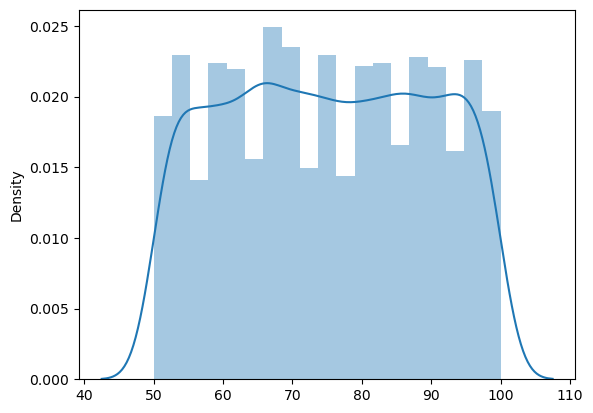

In [29]:
sns.distplot(x =df.Previous_Scores,  hist=True, kde=True)
print(f"Skewness = {df.Previous_Scores.skew()}")

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5824\3662150130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Tutoring_Sessions,  hist=True, kde=True)


Skewness = 0.3037874352308442


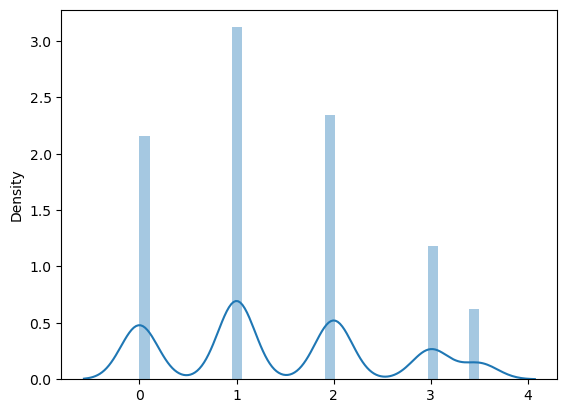

In [30]:
sns.distplot(x =df.Tutoring_Sessions,  hist=True, kde=True)
print(f"Skewness = {df.Tutoring_Sessions.skew()}")

In [31]:
df.Tutoring_Sessions.describe()

count    6378.000000
mean        1.436736
std         1.096792
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.500000
Name: Tutoring_Sessions, dtype: float64

In [32]:
df.Tutoring_Sessions = df.Tutoring_Sessions + (abs(df['Tutoring_Sessions'].min()) + 1)

In [33]:
df.Tutoring_Sessions.describe()

count    6378.000000
mean        2.436736
std         1.096792
min         1.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.500000
Name: Tutoring_Sessions, dtype: float64

In [34]:
# Square Root Transformation
df.Tutoring_Sessions = np.sqrt(df.Tutoring_Sessions)

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5824\3662150130.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Tutoring_Sessions,  hist=True, kde=True)


Skewness = -0.031241375531422436


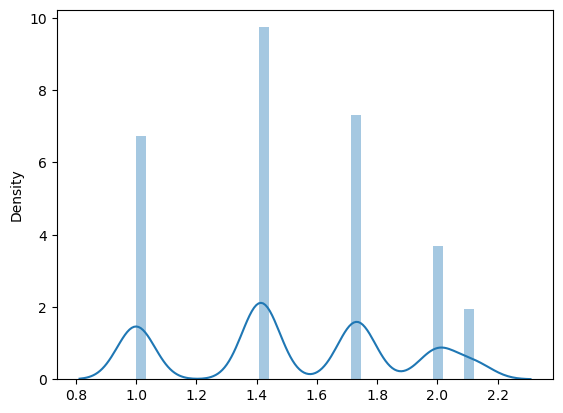

In [35]:
sns.distplot(x =df.Tutoring_Sessions,  hist=True, kde=True)
print(f"Skewness = {df.Tutoring_Sessions.skew()}")

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5824\433134021.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Physical_Activity,  hist=True, kde=True)


Skewness = -0.03705482879464206


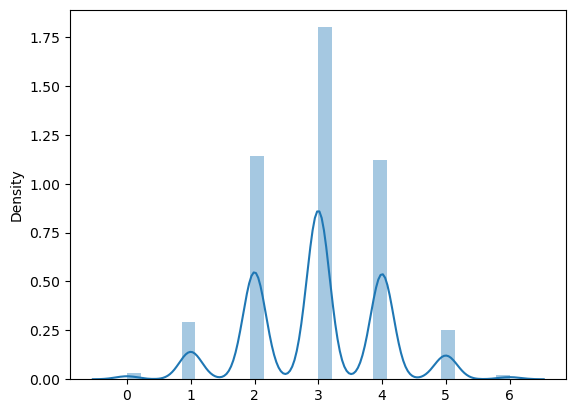

In [36]:
sns.distplot(x =df.Physical_Activity,  hist=True, kde=True)
print(f"Skewness = {df.Physical_Activity.skew()}")

C:\Users\Win 10\AppData\Local\Temp\ipykernel_5824\23401742.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x =df.Exam_Score,  hist=True, kde=True)


Skewness = 0.040137167693040605


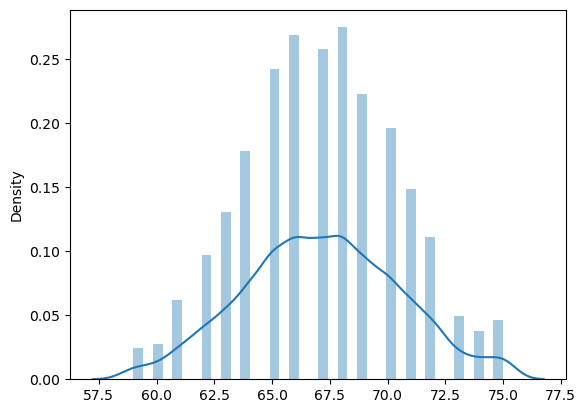

In [37]:
sns.distplot(x =df.Exam_Score,  hist=True, kde=True)
print(f"Skewness = {df.Exam_Score.skew()}")

### Yayyy, we've cleaned the dataset!!!

In [39]:
# Saving cleaned dataset
df.to_csv("Cleaned Student Performance Factors.csv", index = False)

# Handling Categorical Columns

In [41]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,Low,High,No,7,73,Low,Yes,1.000000,Low,Medium,Public,Positive,3,No,High School,Near,Male,67.0
1,19.0,64,Low,Medium,No,8,59,Low,Yes,1.732051,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61.0
2,24.0,98,Medium,Medium,Yes,7,91,Medium,Yes,1.732051,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74.0
3,29.0,89,Low,Medium,Yes,8,98,Medium,Yes,1.414214,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71.0
4,19.0,92,Medium,Medium,Yes,6,65,Medium,Yes,2.000000,Medium,High,Public,Neutral,4,No,College,Near,Female,70.0


In [42]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(col)

Parental_Involvement
Access_to_Resources
Extracurricular_Activities
Motivation_Level
Internet_Access
Family_Income
Teacher_Quality
School_Type
Peer_Influence
Learning_Disabilities
Parental_Education_Level
Distance_from_Home
Gender


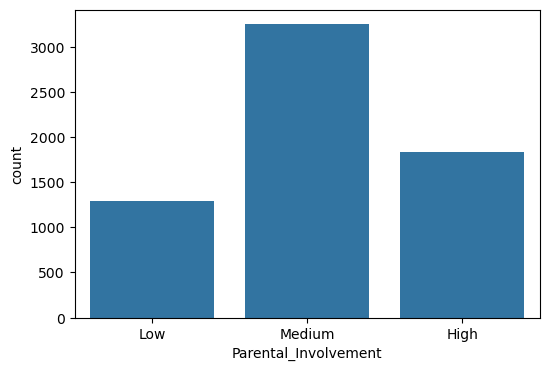

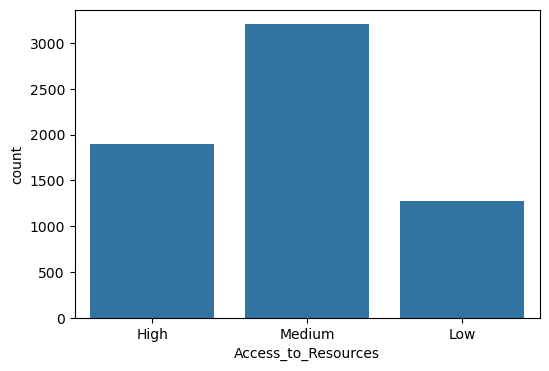

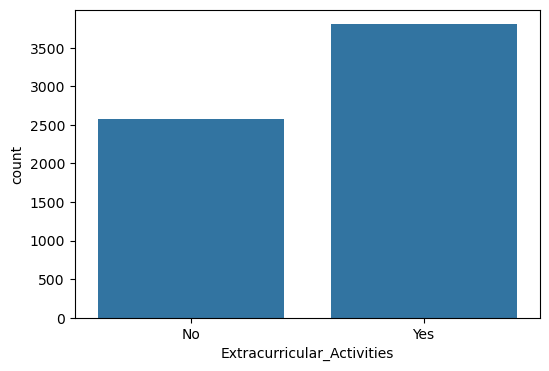

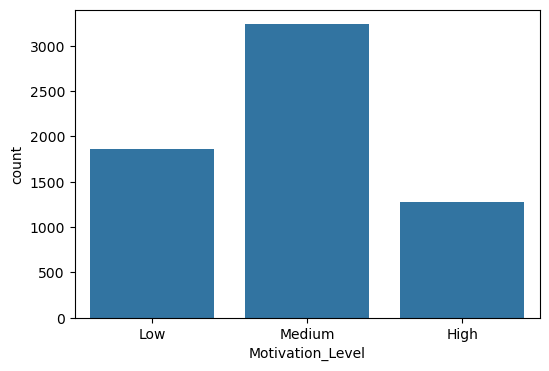

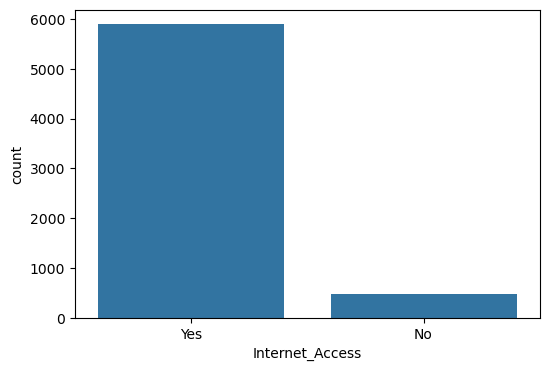

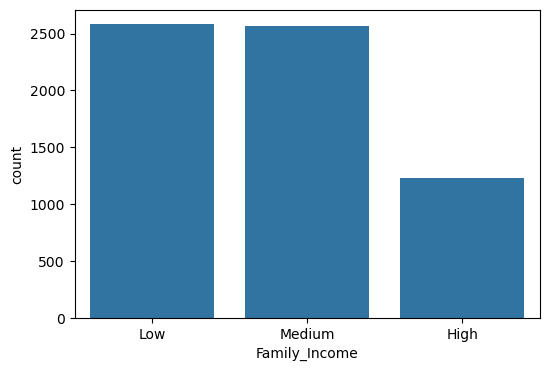

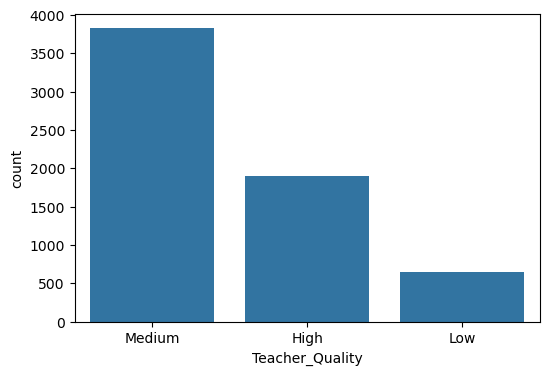

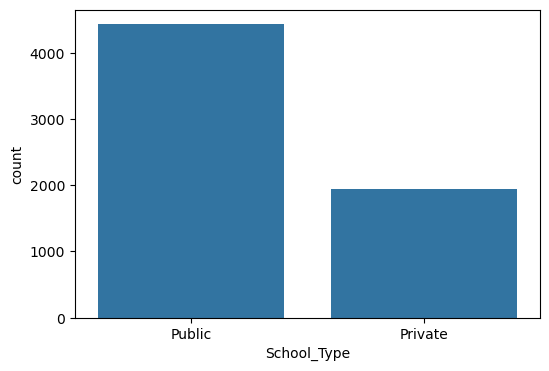

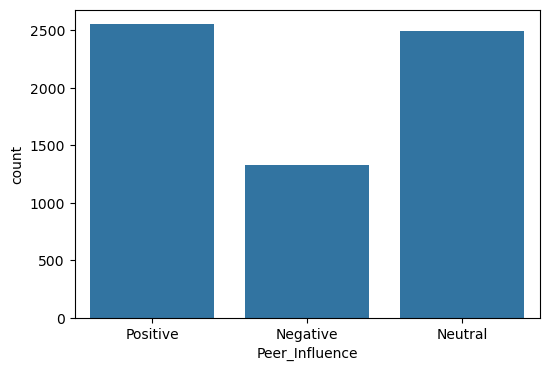

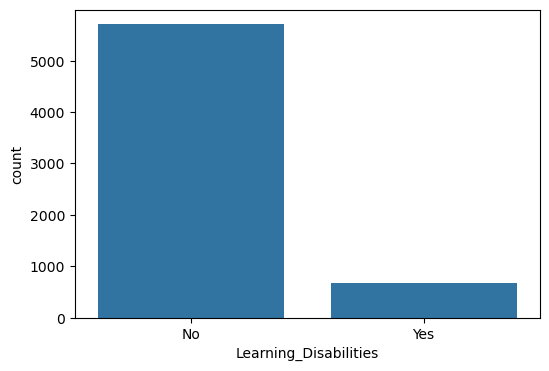

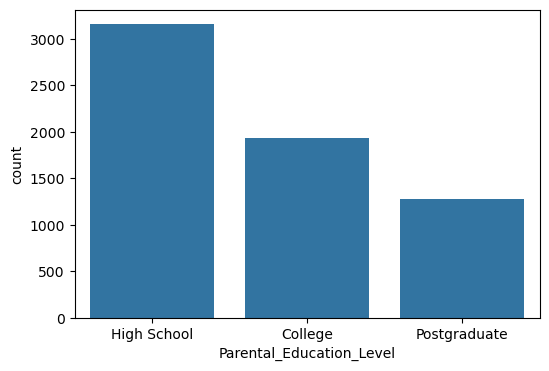

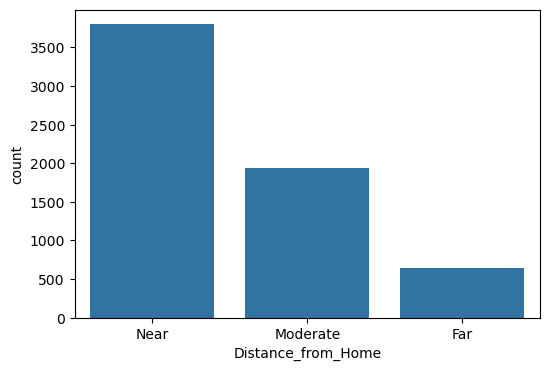

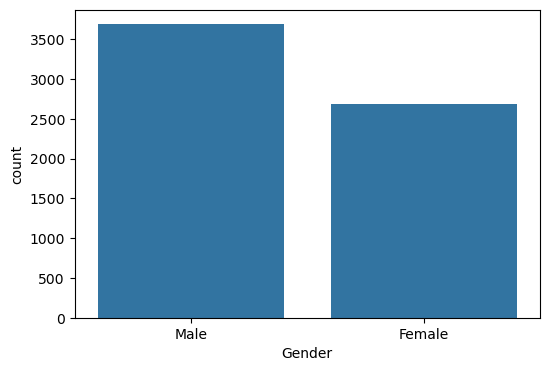

In [43]:
# Plotting a Countplot to visualize all the Categorical Columns
for i, col in enumerate(categorical_cols):
    plt.figure(figsize = (6, 4))  # forces a new figure
    # Create a count plot for categorical columns
    sns.countplot(data=df, x=col,)

In [44]:
df.Parental_Involvement.unique().tolist()

['Low', 'Medium', 'High']

In [45]:
from sklearn.preprocessing import OrdinalEncoder

# Manually specify the order mapping
order_mapping = [['Low', 'Medium', 'High']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Parental_Involvement']])
df['Parental_Involvement'] = encoded_data

In [46]:
df.Access_to_Resources.unique().tolist()

['High', 'Medium', 'Low']

In [47]:
order_mapping = [['Low', 'Medium', 'High']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Access_to_Resources']])
df['Access_to_Resources'] = encoded_data

In [48]:
df.Extracurricular_Activities.unique().tolist()

['No', 'Yes']

In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['Extracurricular_Activities'])
df['Extracurricular_Activities'] = encoded_data

In [50]:
df.Motivation_Level.unique().tolist()

['Low', 'Medium', 'High']

In [51]:
order_mapping = [['Low', 'Medium', 'High']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Motivation_Level']])
df['Motivation_Level'] = encoded_data

In [52]:
df.Internet_Access.unique().tolist()

['Yes', 'No']

In [53]:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['Internet_Access'])
df['Internet_Access'] = encoded_data

In [54]:
df.Family_Income.unique().tolist()

['Low', 'Medium', 'High']

In [55]:
order_mapping = [['Low', 'Medium', 'High']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Family_Income']])
df['Family_Income'] = encoded_data

In [56]:
df.Teacher_Quality.unique().tolist()

['Medium', 'High', 'Low']

In [57]:
order_mapping = [['Low', 'Medium', 'High']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Teacher_Quality']])
df['Teacher_Quality'] = encoded_data

In [58]:
df.School_Type.unique().tolist()

['Public', 'Private']

In [59]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['School_Type'])
df['School_Type'] = encoded_data

In [60]:
df.Peer_Influence.unique().tolist()

['Positive', 'Negative', 'Neutral']

In [61]:
order_mapping = [['Negative', 'Neutral', 'Positive']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Peer_Influence']])
df['Peer_Influence'] = encoded_data

In [62]:
df.Learning_Disabilities.unique().tolist()

['No', 'Yes']

In [63]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['Learning_Disabilities'])
df['Learning_Disabilities'] = encoded_data

In [64]:
df.Parental_Education_Level.unique().tolist()

['High School', 'College', 'Postgraduate']

In [65]:
order_mapping = [['High School', 'College', 'Postgraduate']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Parental_Education_Level']])
df['Parental_Education_Level'] = encoded_data

In [66]:
df.Distance_from_Home.unique().tolist()

['Near', 'Moderate', 'Far']

In [67]:
order_mapping = [['Near', 'Moderate', 'Far']]

# Create and fit the OrdinalEncoder with the custom order mapping
encoder = OrdinalEncoder(categories=order_mapping)
encoded_data = encoder.fit_transform(df[['Distance_from_Home']])
df['Distance_from_Home'] = encoded_data

In [68]:
df.Gender.unique().tolist()

['Male', 'Female']

In [69]:
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(df['Gender'])
df['Gender'] = encoded_data

In [70]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,0.0,2.0,0,7,73,0.0,1,1.000000,0.0,1.0,1,2.0,3,0,0.0,0.0,1,67.0
1,19.0,64,0.0,1.0,0,8,59,0.0,1,1.732051,1.0,1.0,1,0.0,4,0,1.0,1.0,0,61.0
2,24.0,98,1.0,1.0,1,7,91,1.0,1,1.732051,1.0,1.0,1,1.0,4,0,2.0,0.0,1,74.0
3,29.0,89,0.0,1.0,1,8,98,1.0,1,1.414214,1.0,1.0,1,0.0,4,0,0.0,1.0,1,71.0
4,19.0,92,1.0,1.0,1,6,65,1.0,1,2.000000,1.0,2.0,1,1.0,4,0,1.0,0.0,0,70.0


In [71]:
# To check if the datatype of the columns have changed
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6378 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6378 non-null   float64
 1   Attendance                  6378 non-null   int64  
 2   Parental_Involvement        6378 non-null   float64
 3   Access_to_Resources         6378 non-null   float64
 4   Extracurricular_Activities  6378 non-null   int32  
 5   Sleep_Hours                 6378 non-null   int64  
 6   Previous_Scores             6378 non-null   int64  
 7   Motivation_Level            6378 non-null   float64
 8   Internet_Access             6378 non-null   int32  
 9   Tutoring_Sessions           6378 non-null   float64
 10  Family_Income               6378 non-null   float64
 11  Teacher_Quality             6378 non-null   float64
 12  School_Type                 6378 non-null   int32  
 13  Peer_Influence              6378 non-n

#### All the columns have a datatype of either 'int' or 'float'. 
### This means we've successfully converted all the Categorical Columns

# Correlation

<Axes: >

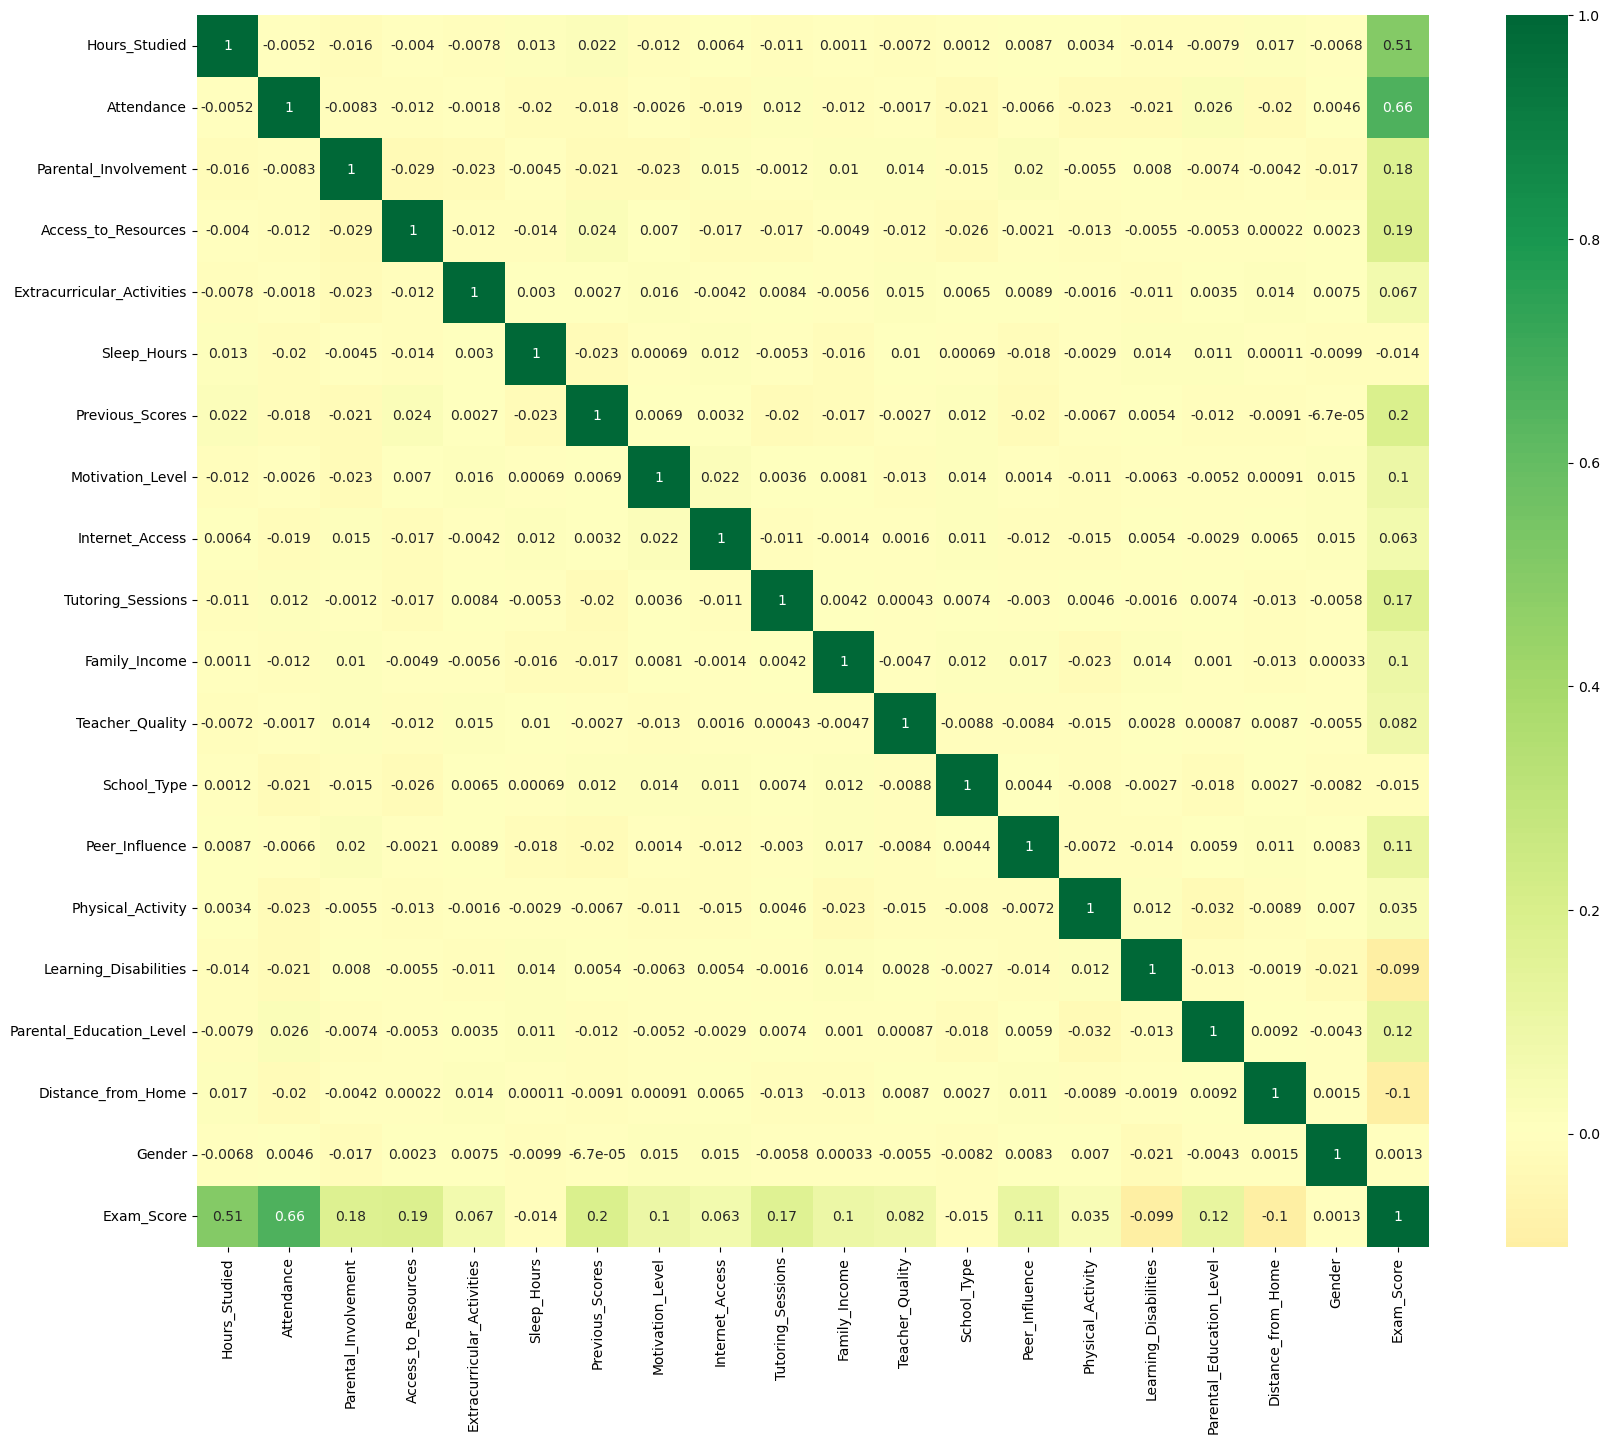

In [74]:
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 16))
# Plot the correlation matrix as a heatmap
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', center=0, square=True)

##### From the Correlation plot, you can see that Hours_Studied and Attendance are highly correlated to Exam_Score
##### While Learning Disabilities and Distance_from_Home are negatively correlated to Exam Score

# Logistic Regression

#### For this Project, we will be using a Logistic Regression Model. 
#### My Goal is to create a model that can predict the Academic success of a student based on some certain factors. 
#### To achieve this, I'll create a Pass/Fail Column (this is our Dependent Variable) and set a threshold using the values in the Exam_Score Column.

In [78]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23.0,84,0.0,2.0,0,7,73,0.0,1,1.000000,0.0,1.0,1,2.0,3,0,0.0,0.0,1,67.0
1,19.0,64,0.0,1.0,0,8,59,0.0,1,1.732051,1.0,1.0,1,0.0,4,0,1.0,1.0,0,61.0
2,24.0,98,1.0,1.0,1,7,91,1.0,1,1.732051,1.0,1.0,1,1.0,4,0,2.0,0.0,1,74.0
3,29.0,89,0.0,1.0,1,8,98,1.0,1,1.414214,1.0,1.0,1,0.0,4,0,0.0,1.0,1,71.0
4,19.0,92,1.0,1.0,1,6,65,1.0,1,2.000000,1.0,2.0,1,1.0,4,0,1.0,0.0,0,70.0


In [79]:
# Creating a categorical column as our dependent variable in the Logistic Regression Analysis
df["Pass_Fail"] = (df["Exam_Score"] >= 65).astype(int)

#### Pass = 1, Fail = 0

In [81]:
# Deleting irrelevant Columns
del df['Exam_Score']
del df['Learning_Disabilities']
del df['Distance_from_Home']
del df['Sleep_Hours']
del df['School_Type']
del df['Gender']
del df['Physical_Activity']

In [82]:
y = df["Pass_Fail"]
X = df.drop("Pass_Fail", axis=1)

In [83]:
X.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Parental_Education_Level
0,23.0,84,0.0,2.0,0,73,0.0,1,1.000000,0.0,1.0,2.0,0.0
1,19.0,64,0.0,1.0,0,59,0.0,1,1.732051,1.0,1.0,0.0,1.0
2,24.0,98,1.0,1.0,1,91,1.0,1,1.732051,1.0,1.0,1.0,2.0
3,29.0,89,0.0,1.0,1,98,1.0,1,1.414214,1.0,1.0,0.0,0.0
4,19.0,92,1.0,1.0,1,65,1.0,1,2.000000,1.0,2.0,1.0,1.0


In [84]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Pass_Fail, dtype: int32

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
X_train.shape

(5102, 13)

In [87]:
X_test.shape

(1276, 13)

In [88]:
# Creating an instance of the Logistic Regression model
model = LogisticRegression()

# Training the model on the training data
model.fit(X_train, y_train)

C:\Users\Win 10\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
# Making predictions on the test data
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [90]:
# Evaluating the model's accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.9108192865542925


In [91]:
# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.9098746081504702


In [92]:
# Defining the hyperparameters to tune and their potential values
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Performing grid search to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best hyperparameters and the corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

C:\Users\Win 10\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Win 10\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Win 10\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Win 10\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Win 10\Downloads\Anaconda\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Win 10\Downloads\Anaconda\Lib\site-packages\sklearn

In [93]:
# Evaluating the best model on the train data
accuracy = best_model.score(X_train, y_train)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.9590356722853783


In [94]:
# Evaluating the best model on the test data
accuracy = best_model.score(X_test, y_test)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.957680250783699


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
final_model = LogisticRegression(C=10, penalty="l1", solver="liblinear")

In [97]:
# Training the model on the training data
final_model.fit(X_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [98]:
# Making predictions on the test data
y_pred = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

In [99]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy
accuracy = accuracy_score(y_train, y_pred)
print("Train Accuracy:", accuracy)

Train Accuracy: 0.9568796550372403


In [100]:
from sklearn.metrics import accuracy_score
# Evaluating the model's accuracy
accuracy = accuracy_score(y_test, y_pred_test)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.957680250783699


### After applying the Hyperparameters, the Machine learning Model achieved an accuracy of 95.7% !!!

# Model Prediction Widget

##### Now we input our values, and predict the academic success of Students

### GUIDE
##### Only input numerical values into the model
Hours_Studied:               Number of hours spent studying per week.

Attendance:                  Percentage of classes attended.

Parental_Involvement:        Level of parental involvement in the student's education (0 = Low, 1 = Medium, 2 = High).

Access_to_Resources:         Availability of educational resources (0 = Low, 1 = Medium, 2 = High).

Extracurricular_Activities:  Participation in extracurricular activities (1 = Yes, 0 = No).

Previous_Scores:             Scores from previous exams.

Motivation_Level:            Student's level of motivation (0 = Low, 1 = Medium, 2 = High).

Internet_Access:             Availability of internet access (1 = Yes, 0 = No).

Tutoring_Sessions:           Number of tutoring sessions attended per month.

Family_Income:               Family income level (0 = Low, 1 = Medium, 2 = High).

Teacher_Quality:             Quality of the teachers (0 = Low, 1 = Medium, 2 = High).

Peer_Influence:              Influence of peers on academic performance (0 = Negative, 1 = Neutral, 2 = Positive).

Parental_Education_Level:    Highest education level of parents (0 = High School, 1 = College, 2 = Postgraduate).

In [105]:
import ipywidgets as widgets
from IPython.display import display

model1 =final_model

X_train = X

# Create a dictionary to store the input widgets
input_widgets = {}

# Create text input widgets for each feature in X_train
for feature in X_train.columns:
    input_widgets[feature] = widgets.Text(description=feature + ': ')
prediction = 0
# Create a prediction function
def make_prediction(b):
    input_features = {}
    
    # Retrieve the input values from the widgets
    for feature, widget in input_widgets.items():
        input_features[feature] = widget.value

    # Prepare the input data as a dictionary
    input_data = {feature: [value] for feature, value in input_features.items()}

    # Create a DataFrame from the input data
    input_df = pd.DataFrame(input_data)

    # Make a prediction
    prediction = model1.predict(input_df)

    # Display the prediction
    with output:
        print(f'Pass[1] or Fail[0]: {prediction[0]}')

# Create a button for prediction
predict_button = widgets.Button(description='Predict', button_style= "danger")
predict_button.on_click(make_prediction)
output = widgets.Output()

# Display the input widgets and prediction button
input_widgets_list = list(input_widgets.values())
input_widgets_list.append(predict_button)
input_widgets_list.append(output)
display(*input_widgets_list)

Text(value='', description='Hours_Studied: ')

Text(value='', description='Attendance: ')

Text(value='', description='Parental_Involvement: ')

Text(value='', description='Access_to_Resources: ')

Text(value='', description='Extracurricular_Activities: ')

Text(value='', description='Previous_Scores: ')

Text(value='', description='Motivation_Level: ')

Text(value='', description='Internet_Access: ')

Text(value='', description='Tutoring_Sessions: ')

Text(value='', description='Family_Income: ')

Text(value='', description='Teacher_Quality: ')

Text(value='', description='Peer_Influence: ')

Text(value='', description='Parental_Education_Level: ')

Button(button_style='danger', description='Predict', style=ButtonStyle())

Output()